## Lottery Prediction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# db: https://www.pronosticos.gob.mx/Melate/Historico
df = pd.read_csv('Melate.csv')
mydata = df[['R1', 'FECHA']]
mydata

R1       FECHA
0     29  17/04/2022
1     23  15/04/2022
2      1  13/04/2022
3     19  10/04/2022
4     21  08/04/2022
...   ..         ...
3570   4  16/09/1984
3571   8  09/09/1984
3572  16  02/09/1984
3573   5  26/08/1984
3574   1  19/08/1984

[3575 rows x 2 columns]

0 446
447 893
894 1340
1341 1787
1788 2234
2235 2681
2682 3128


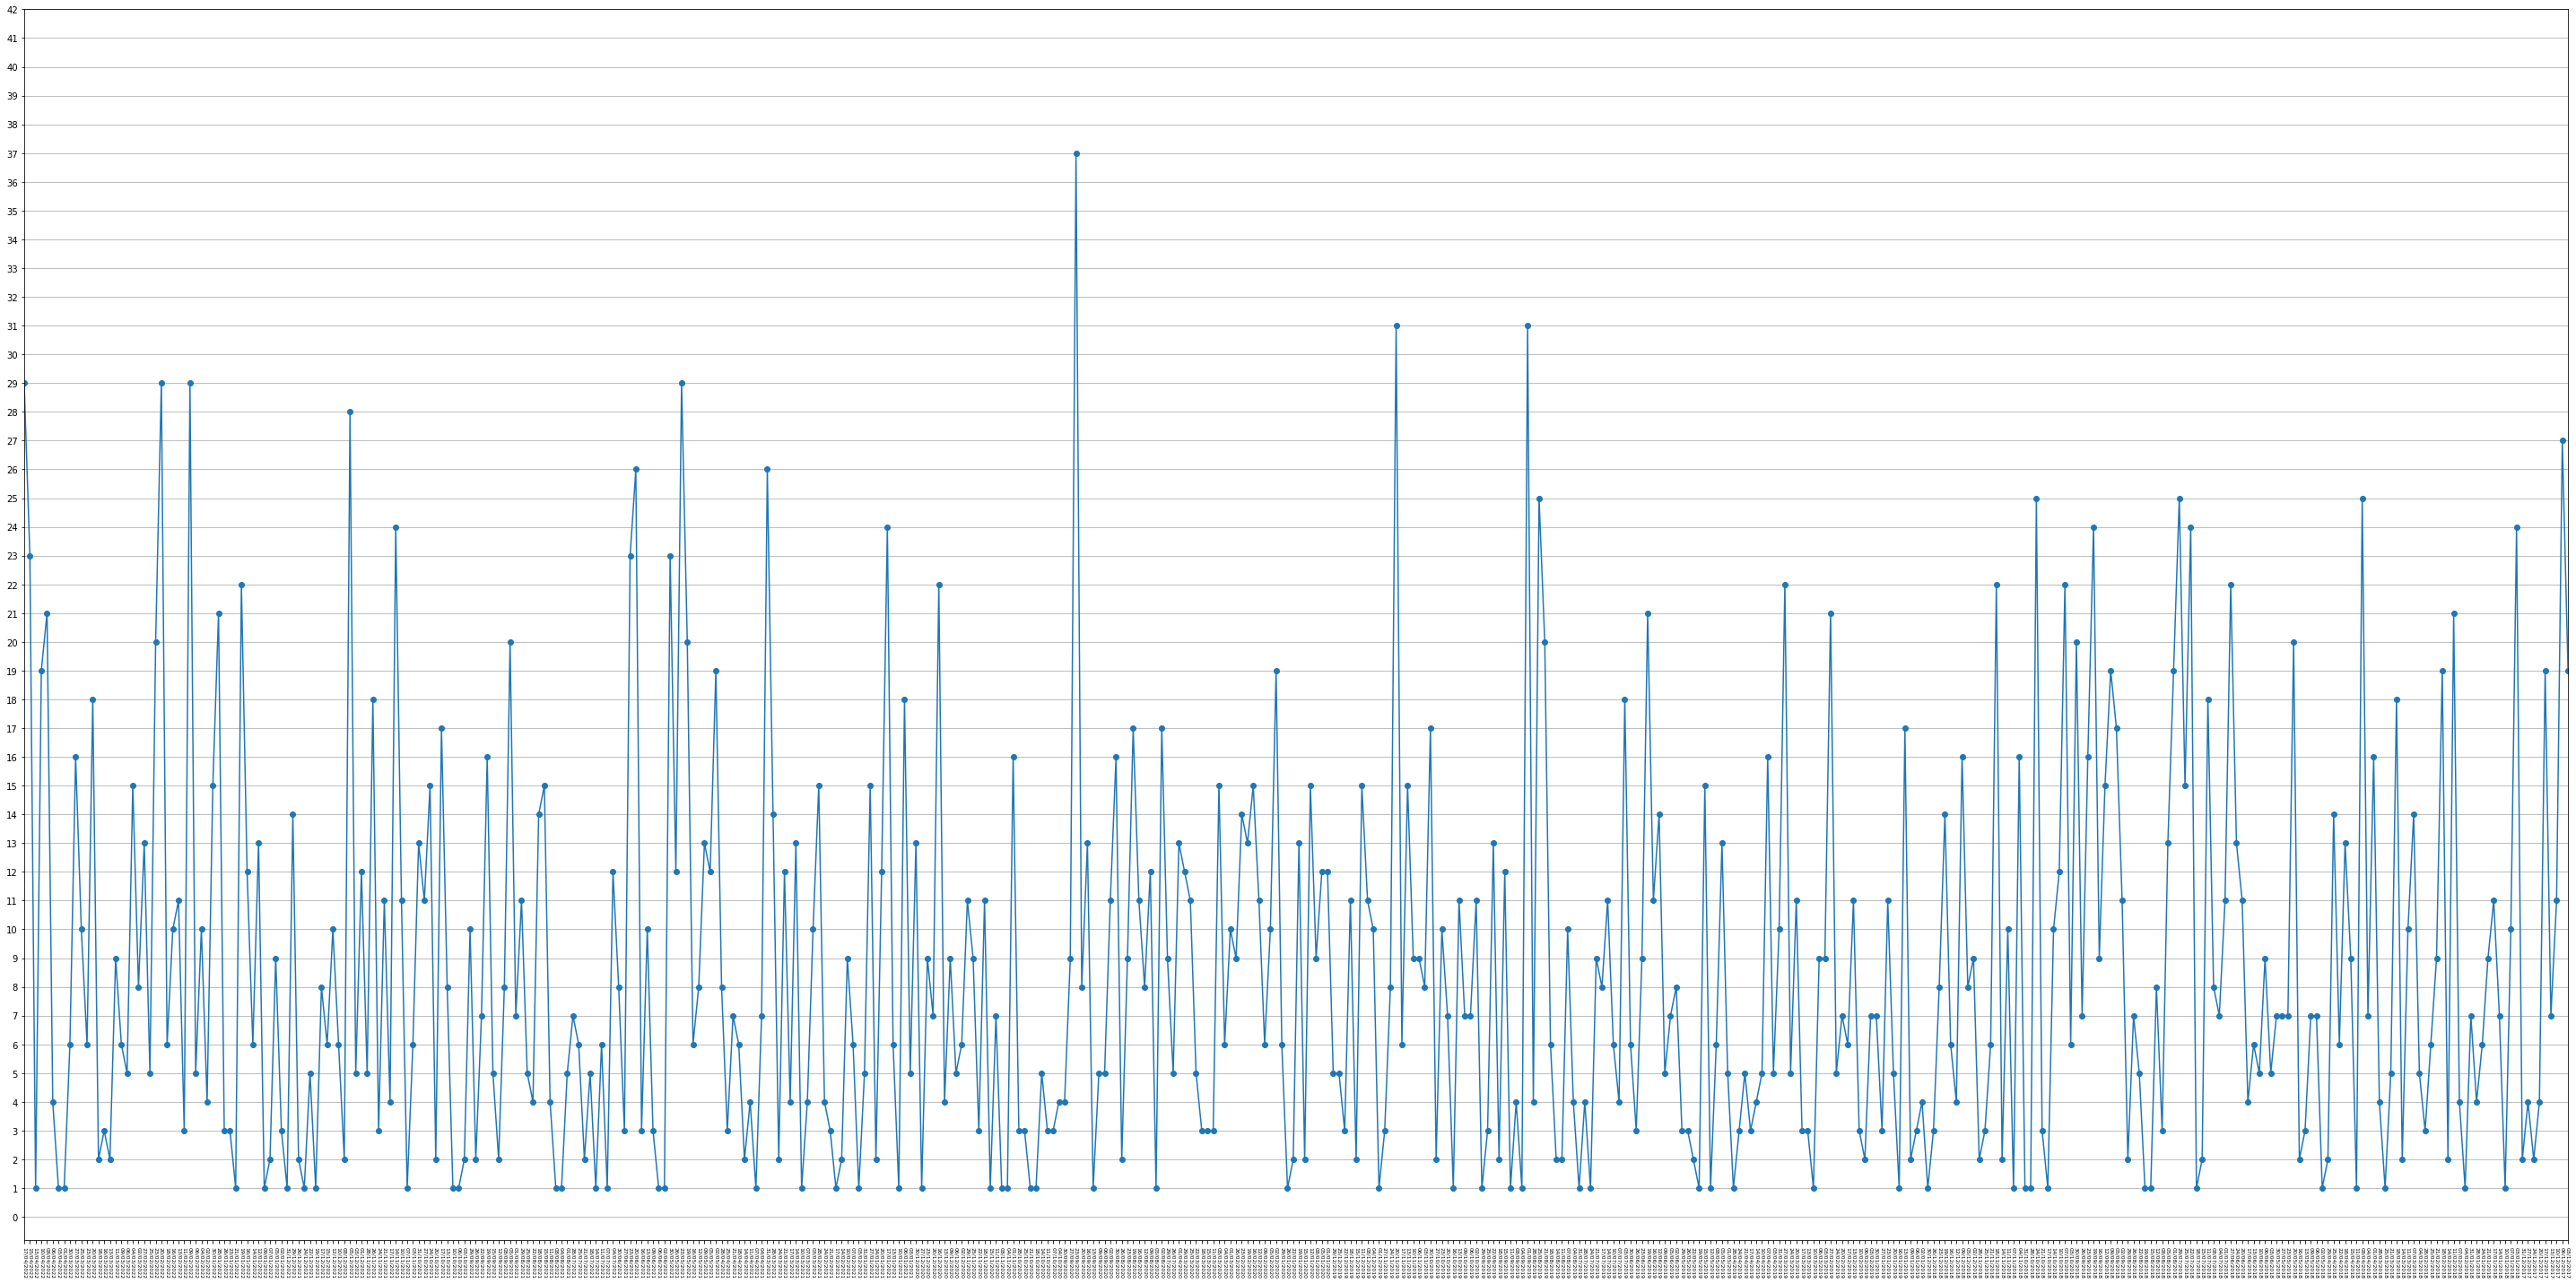

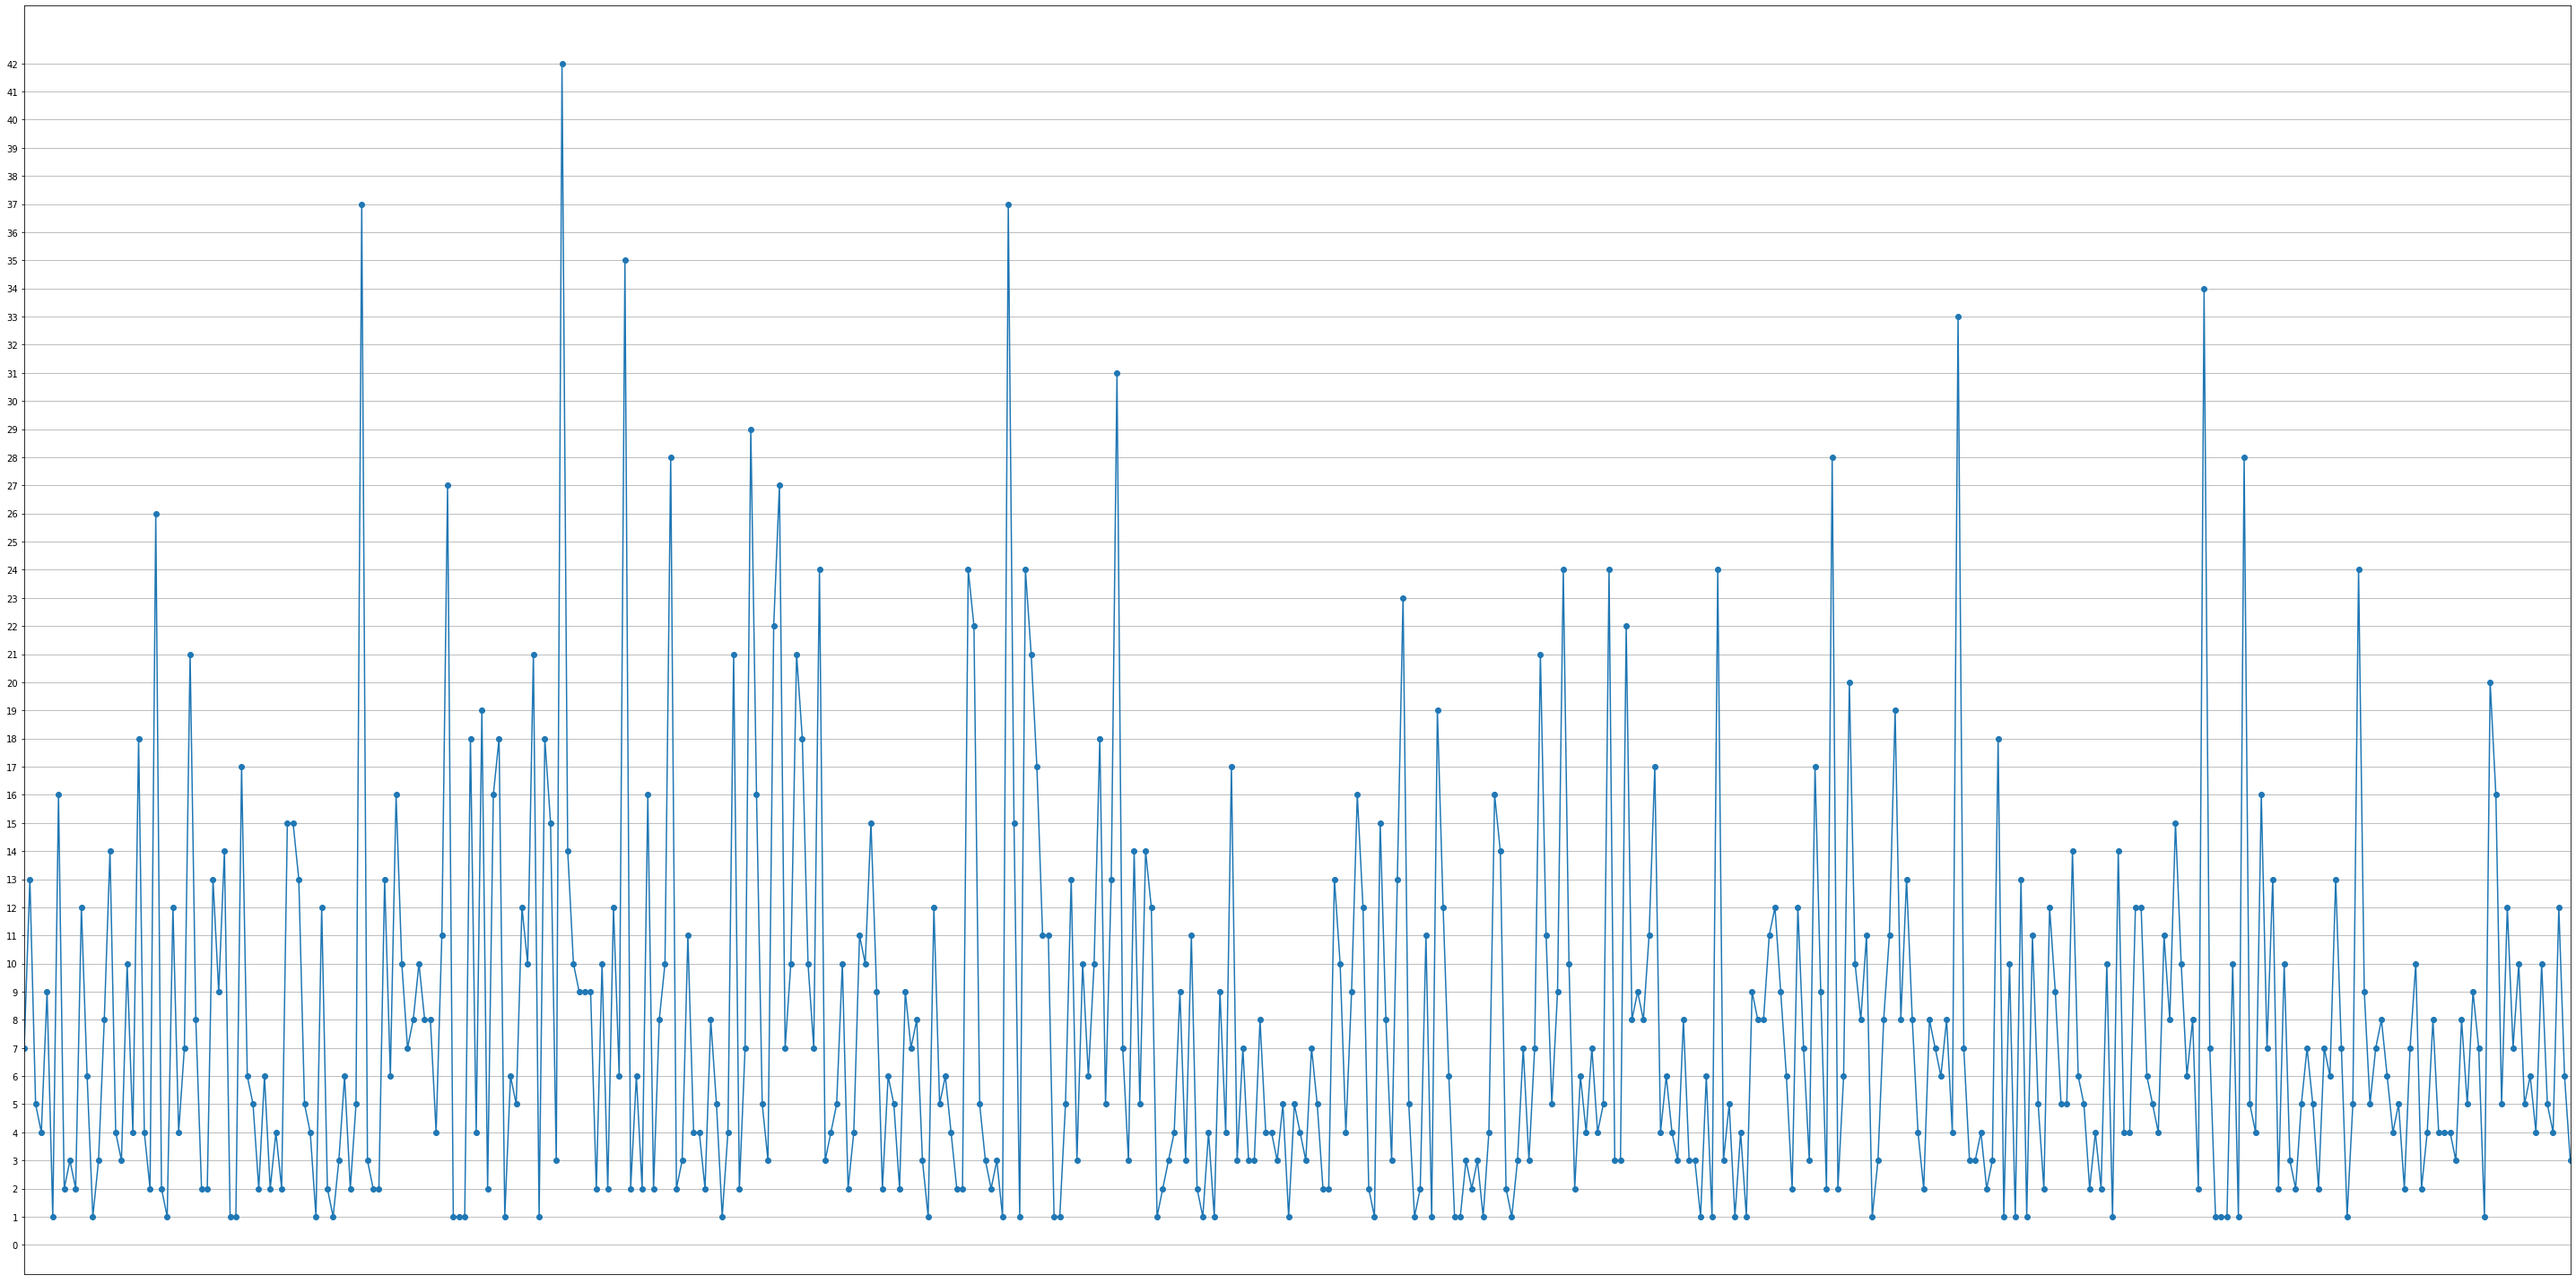

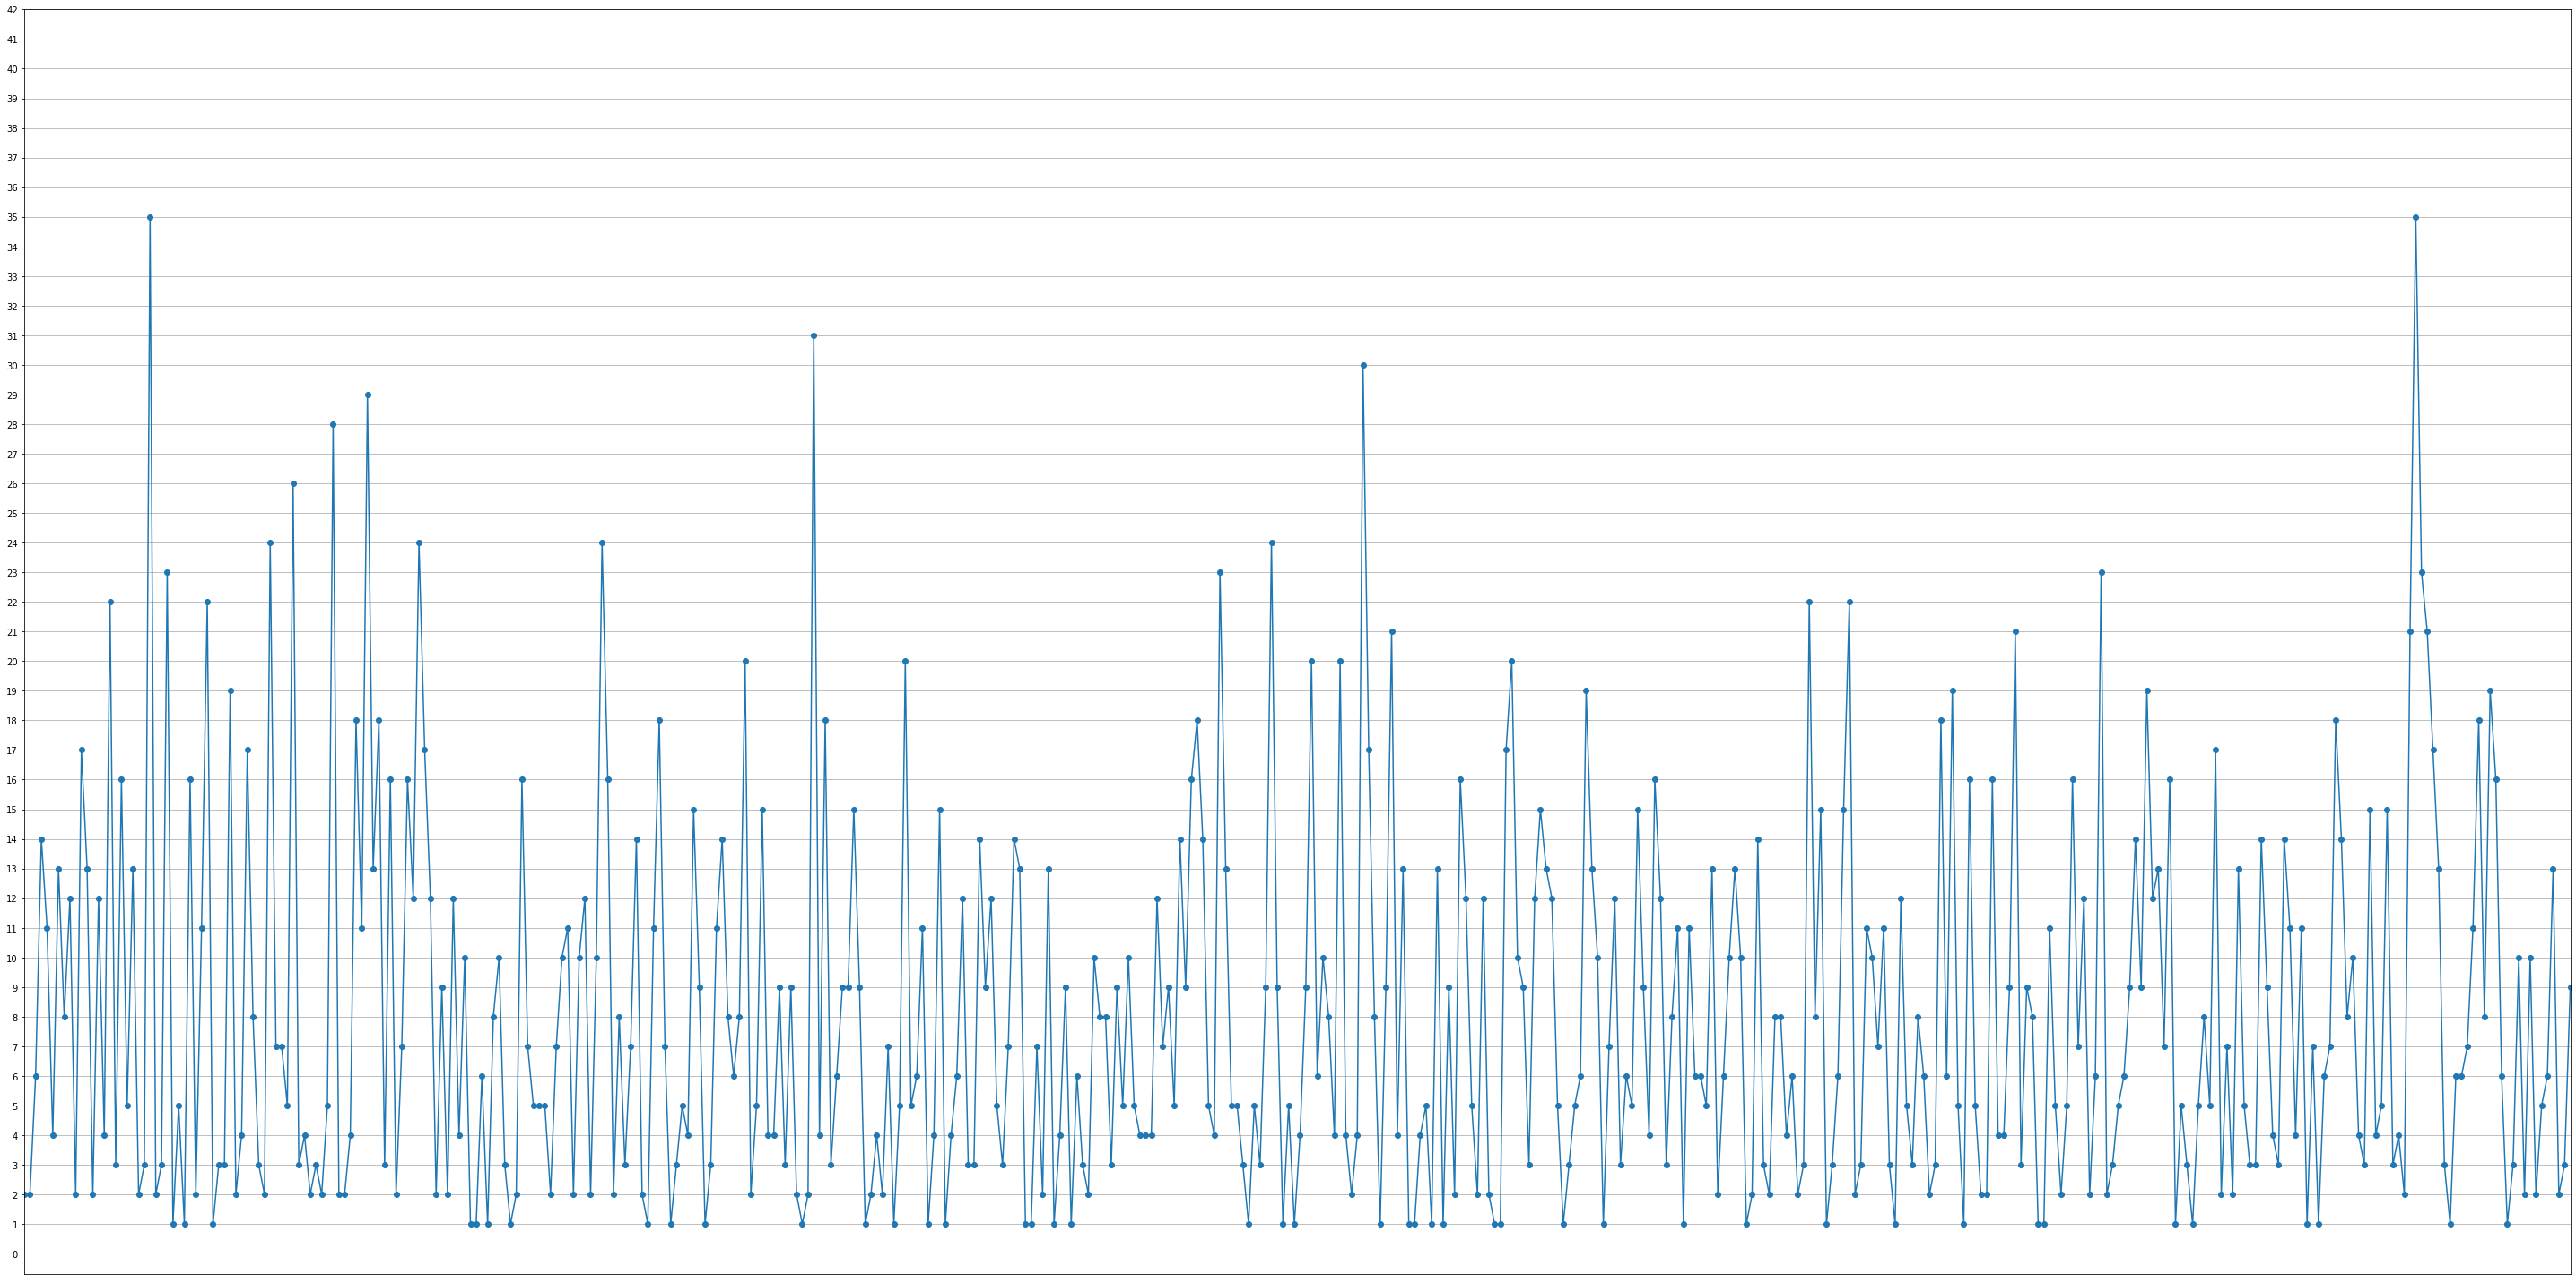

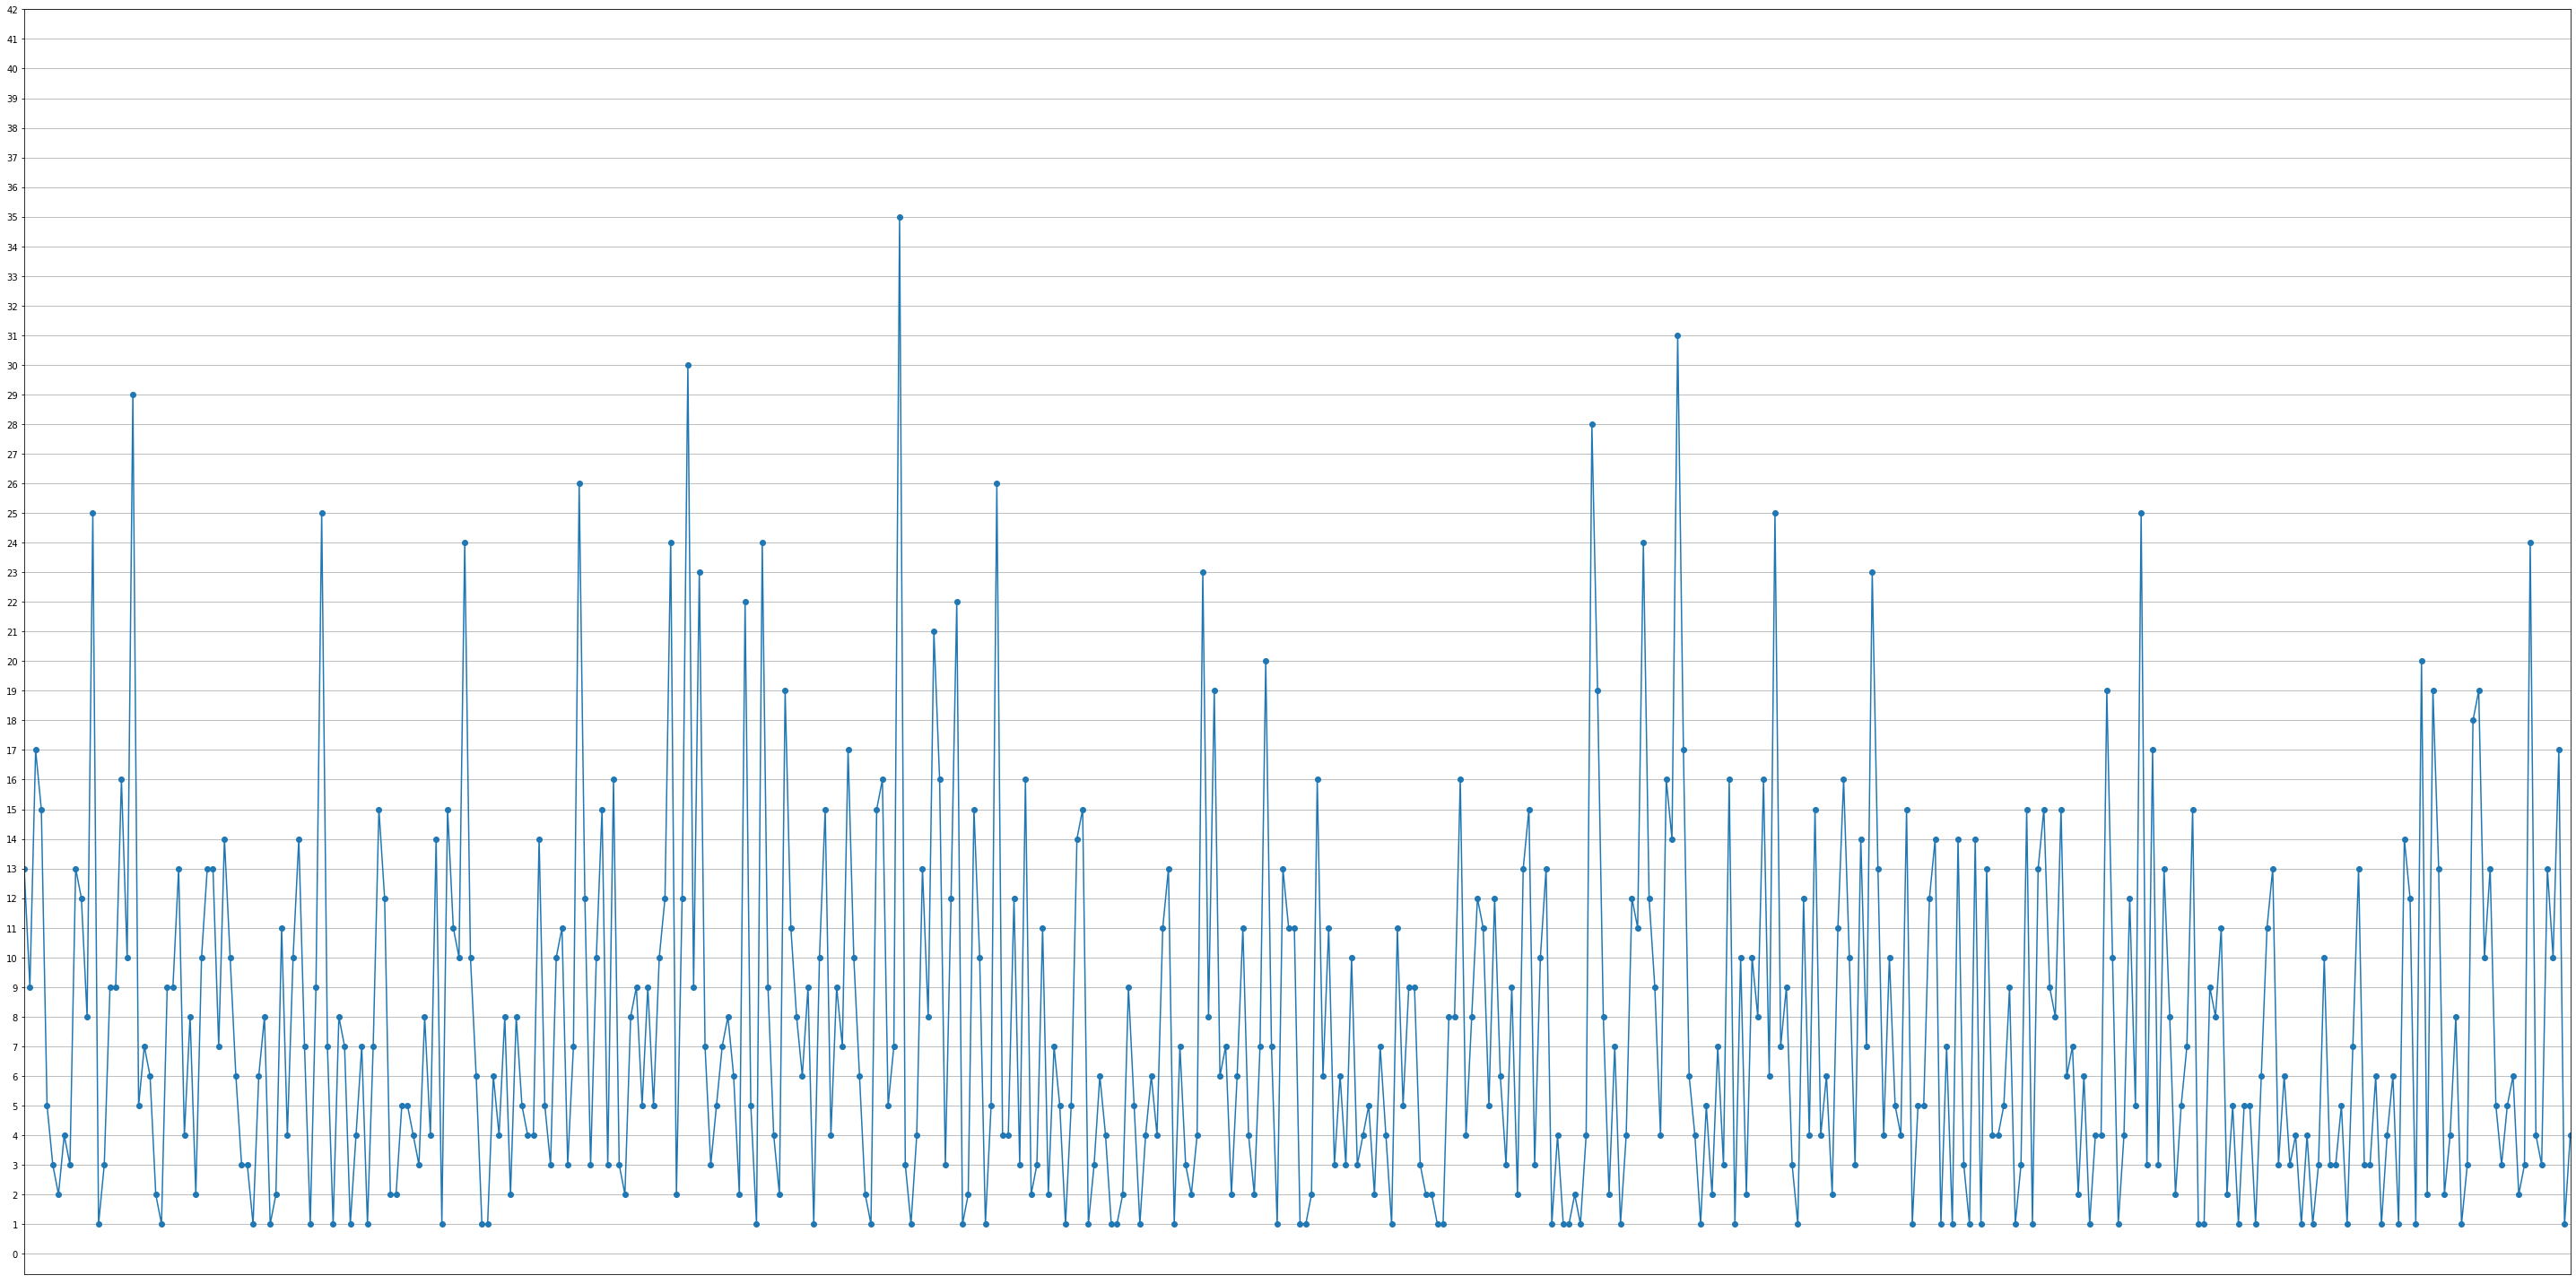

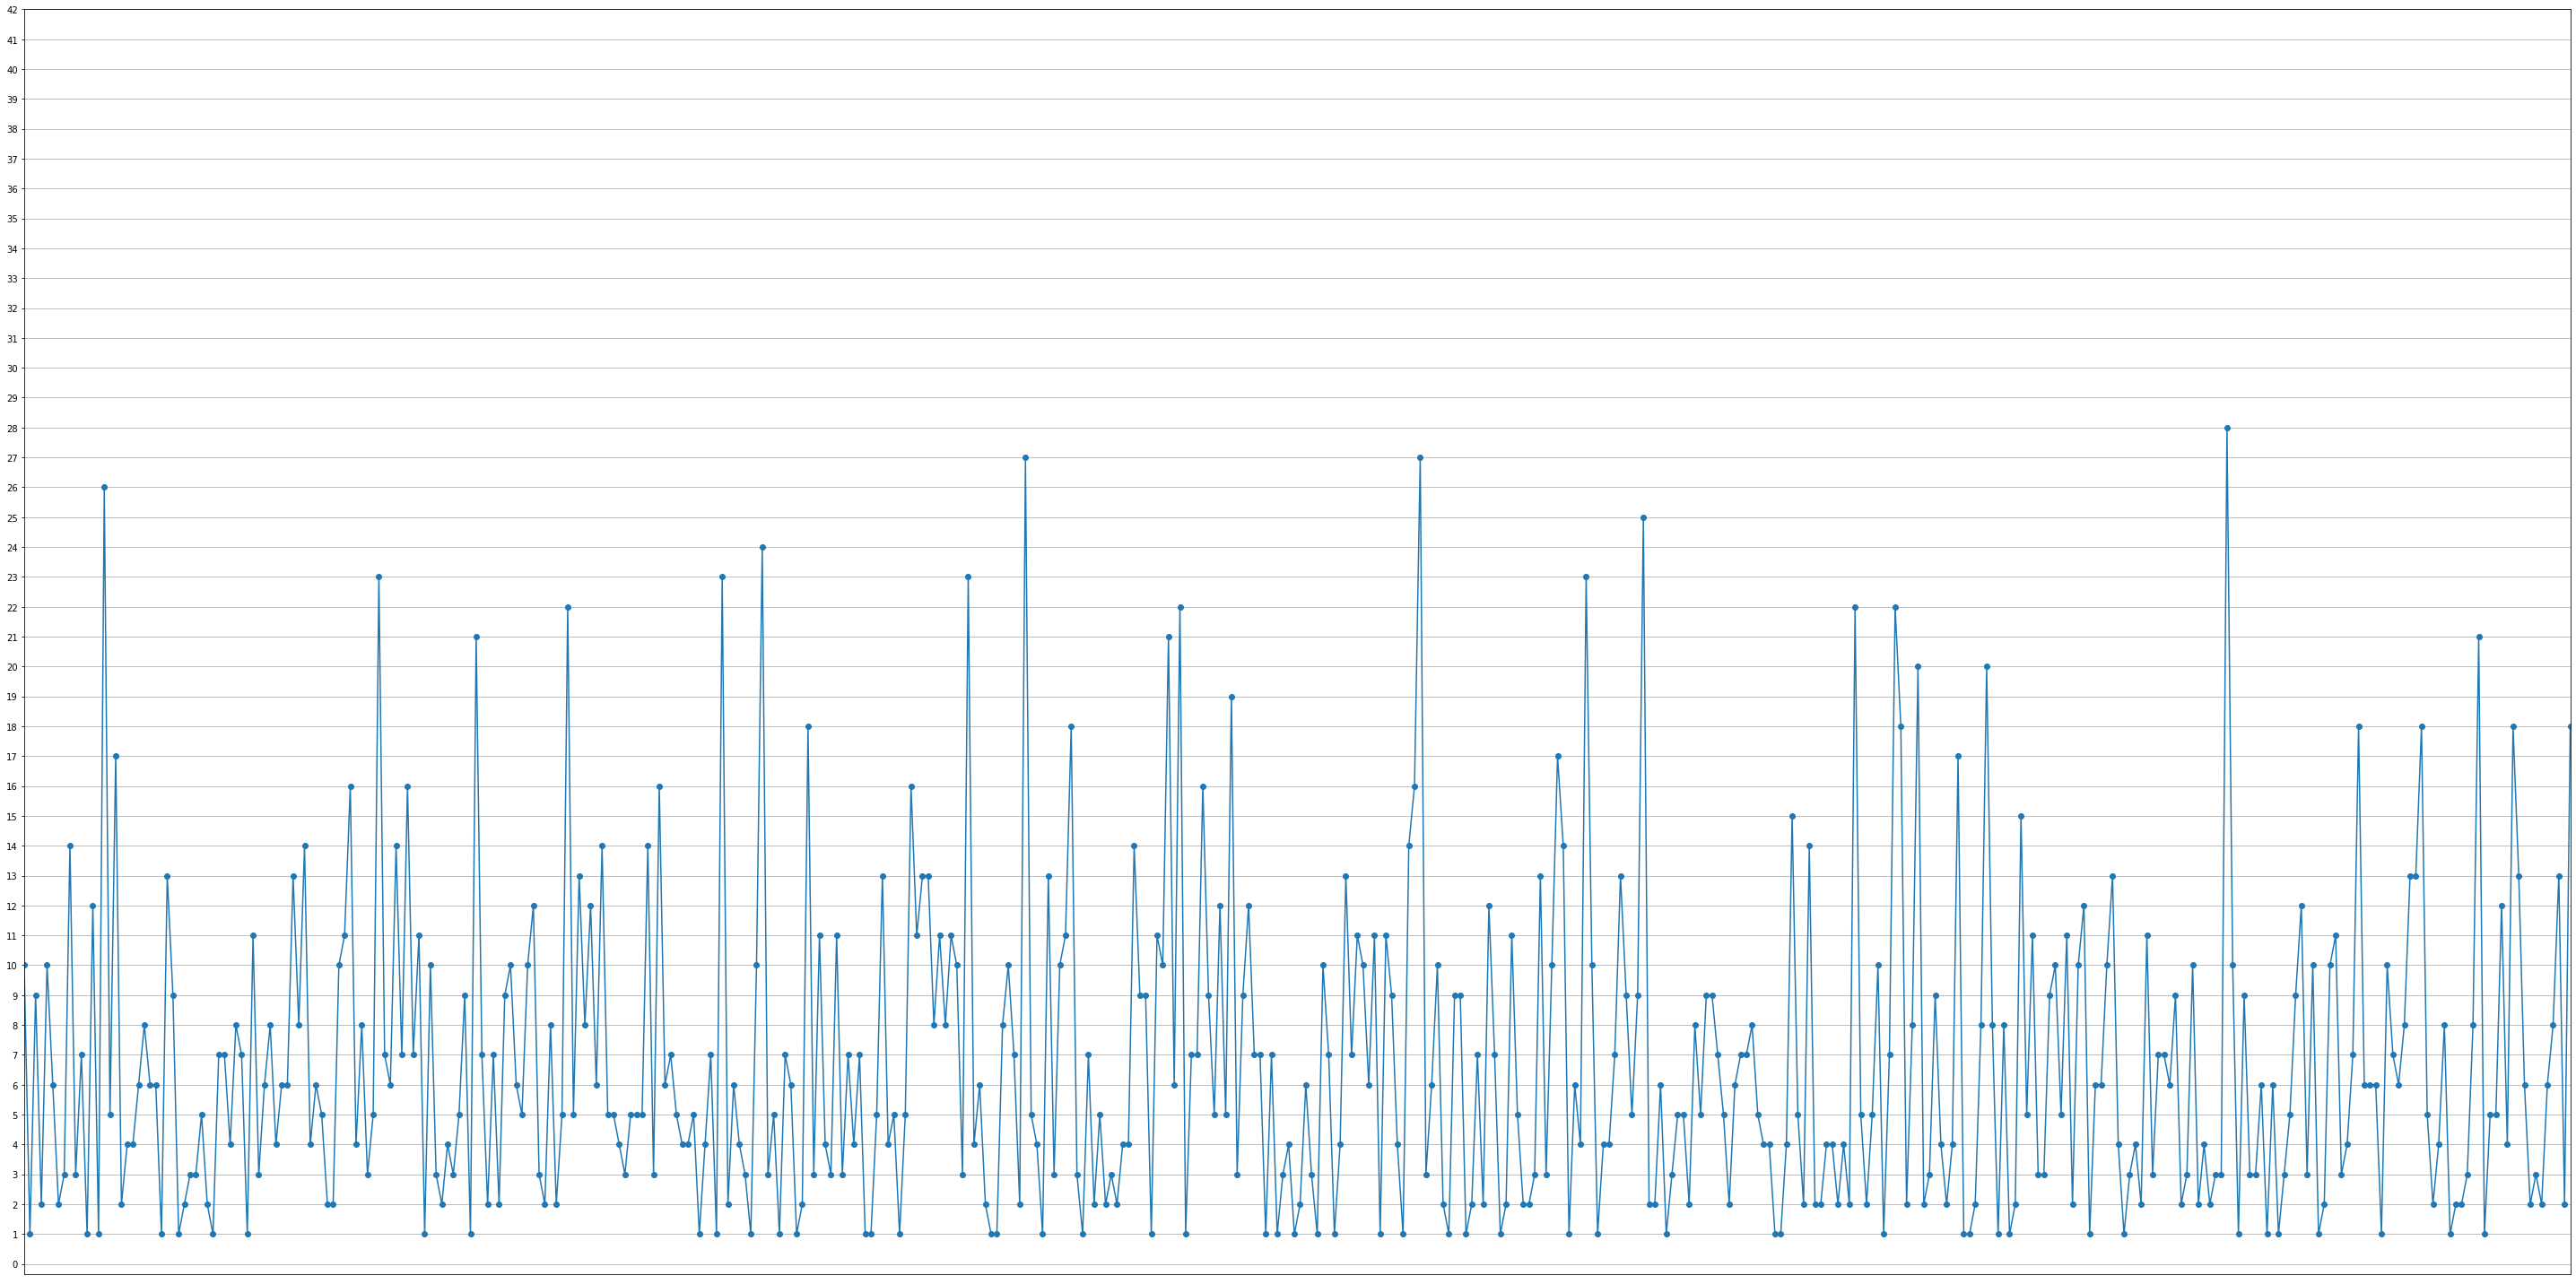

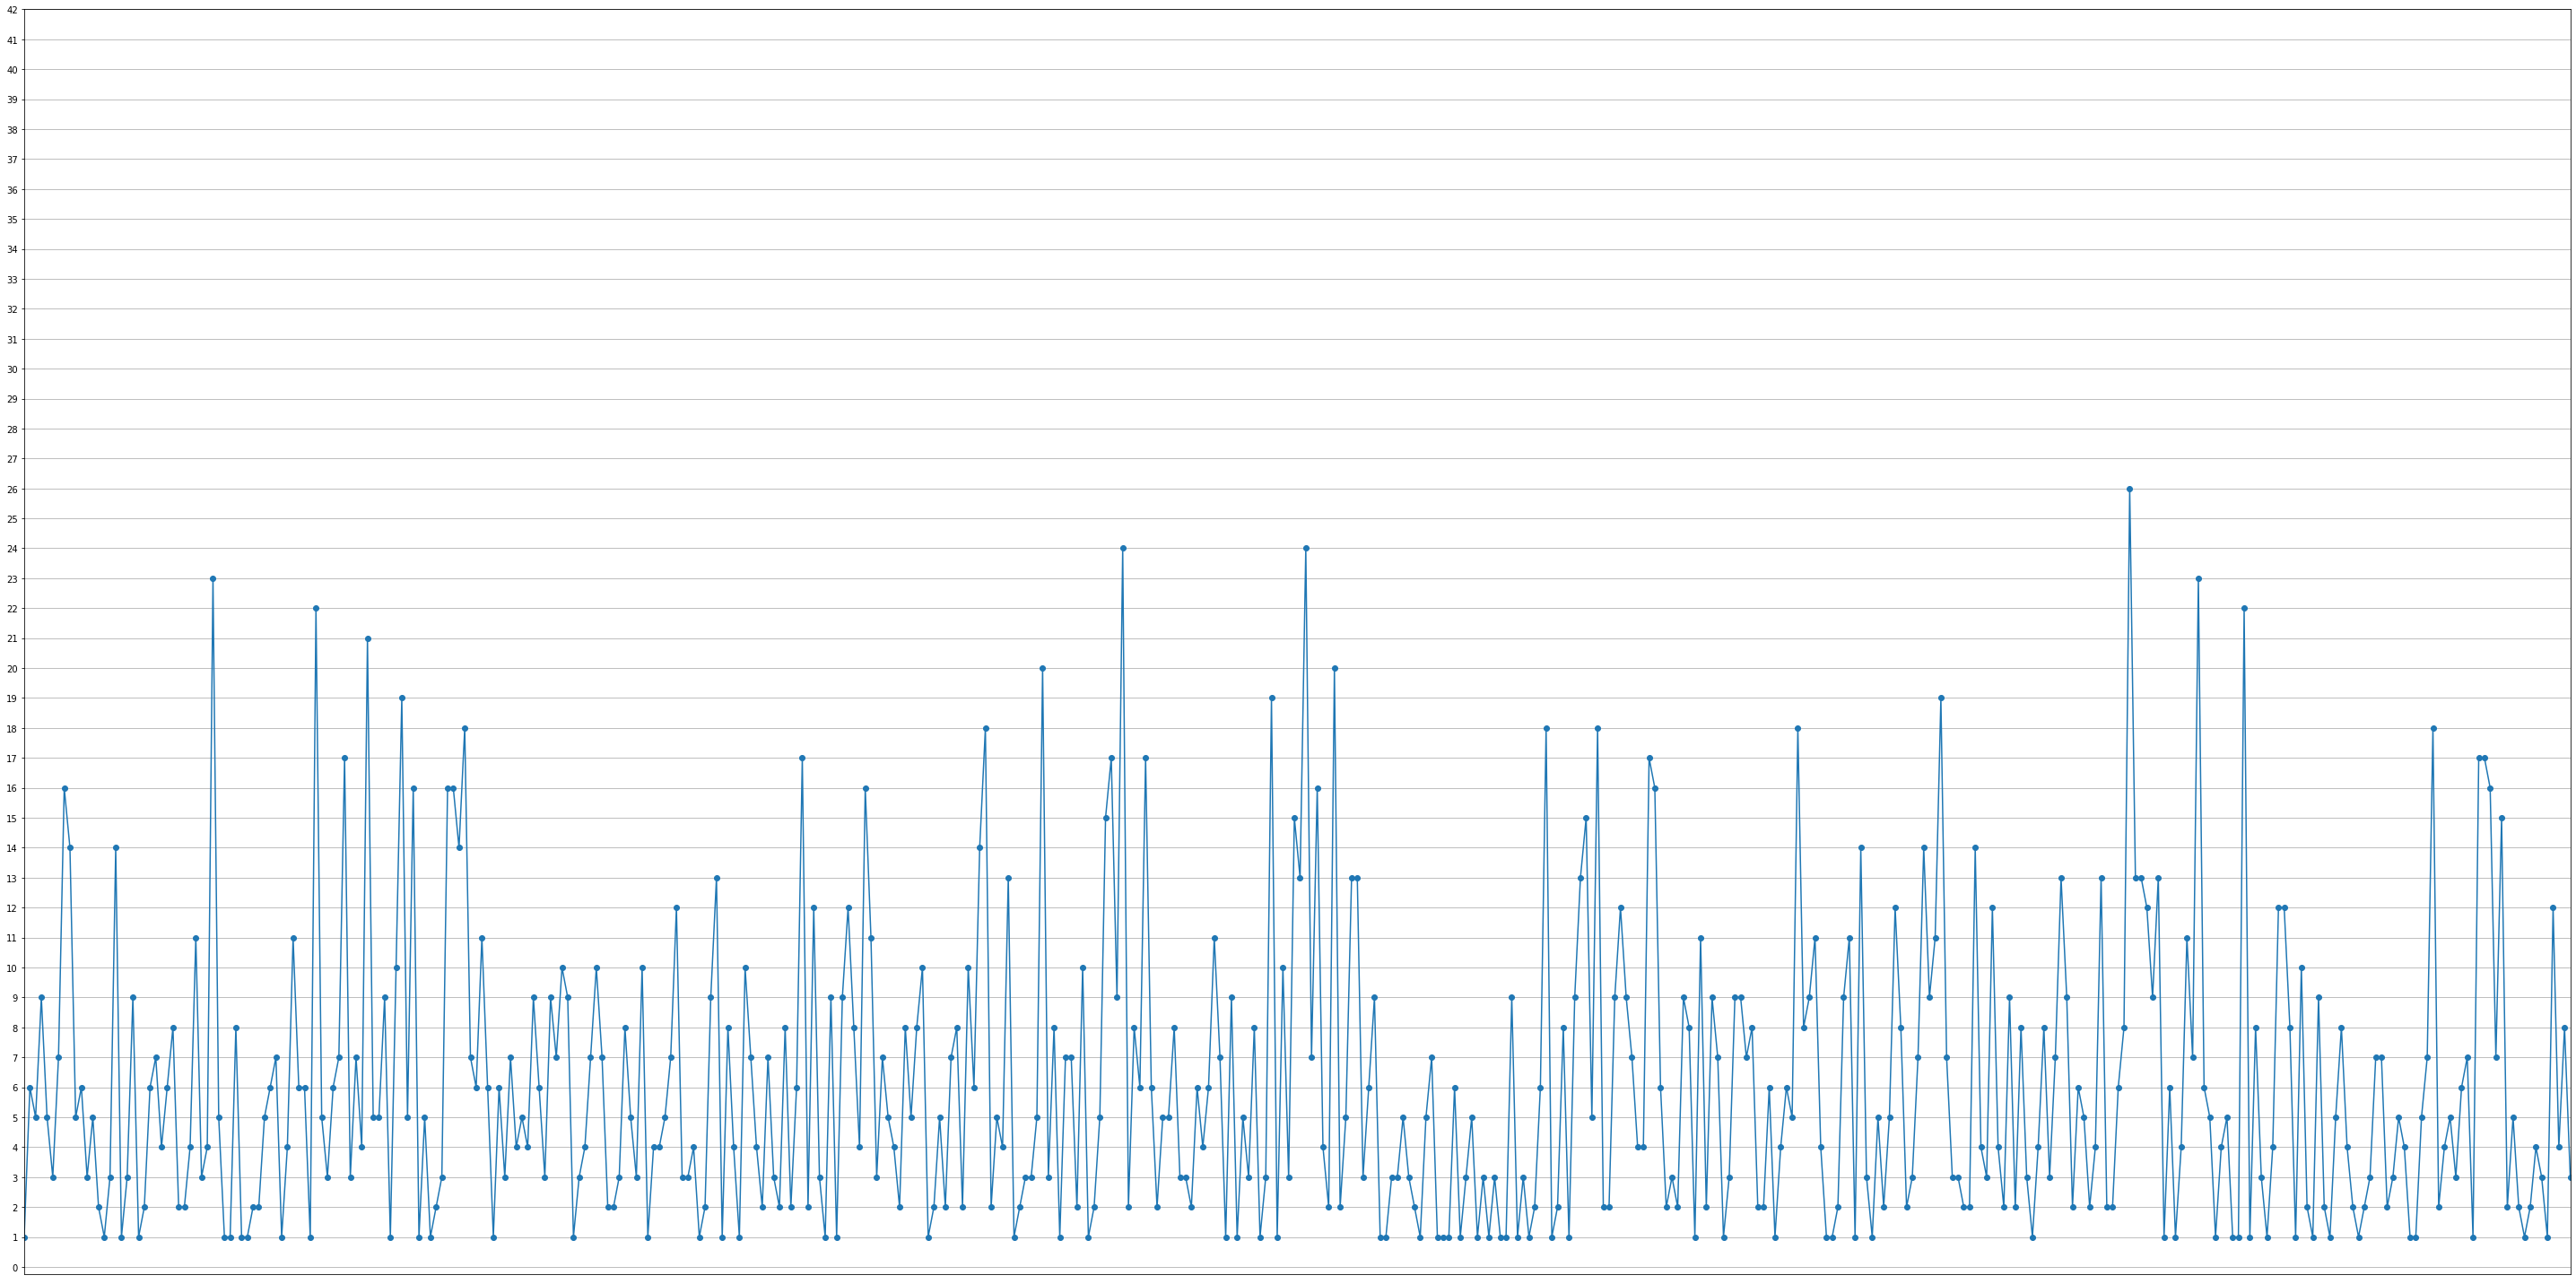

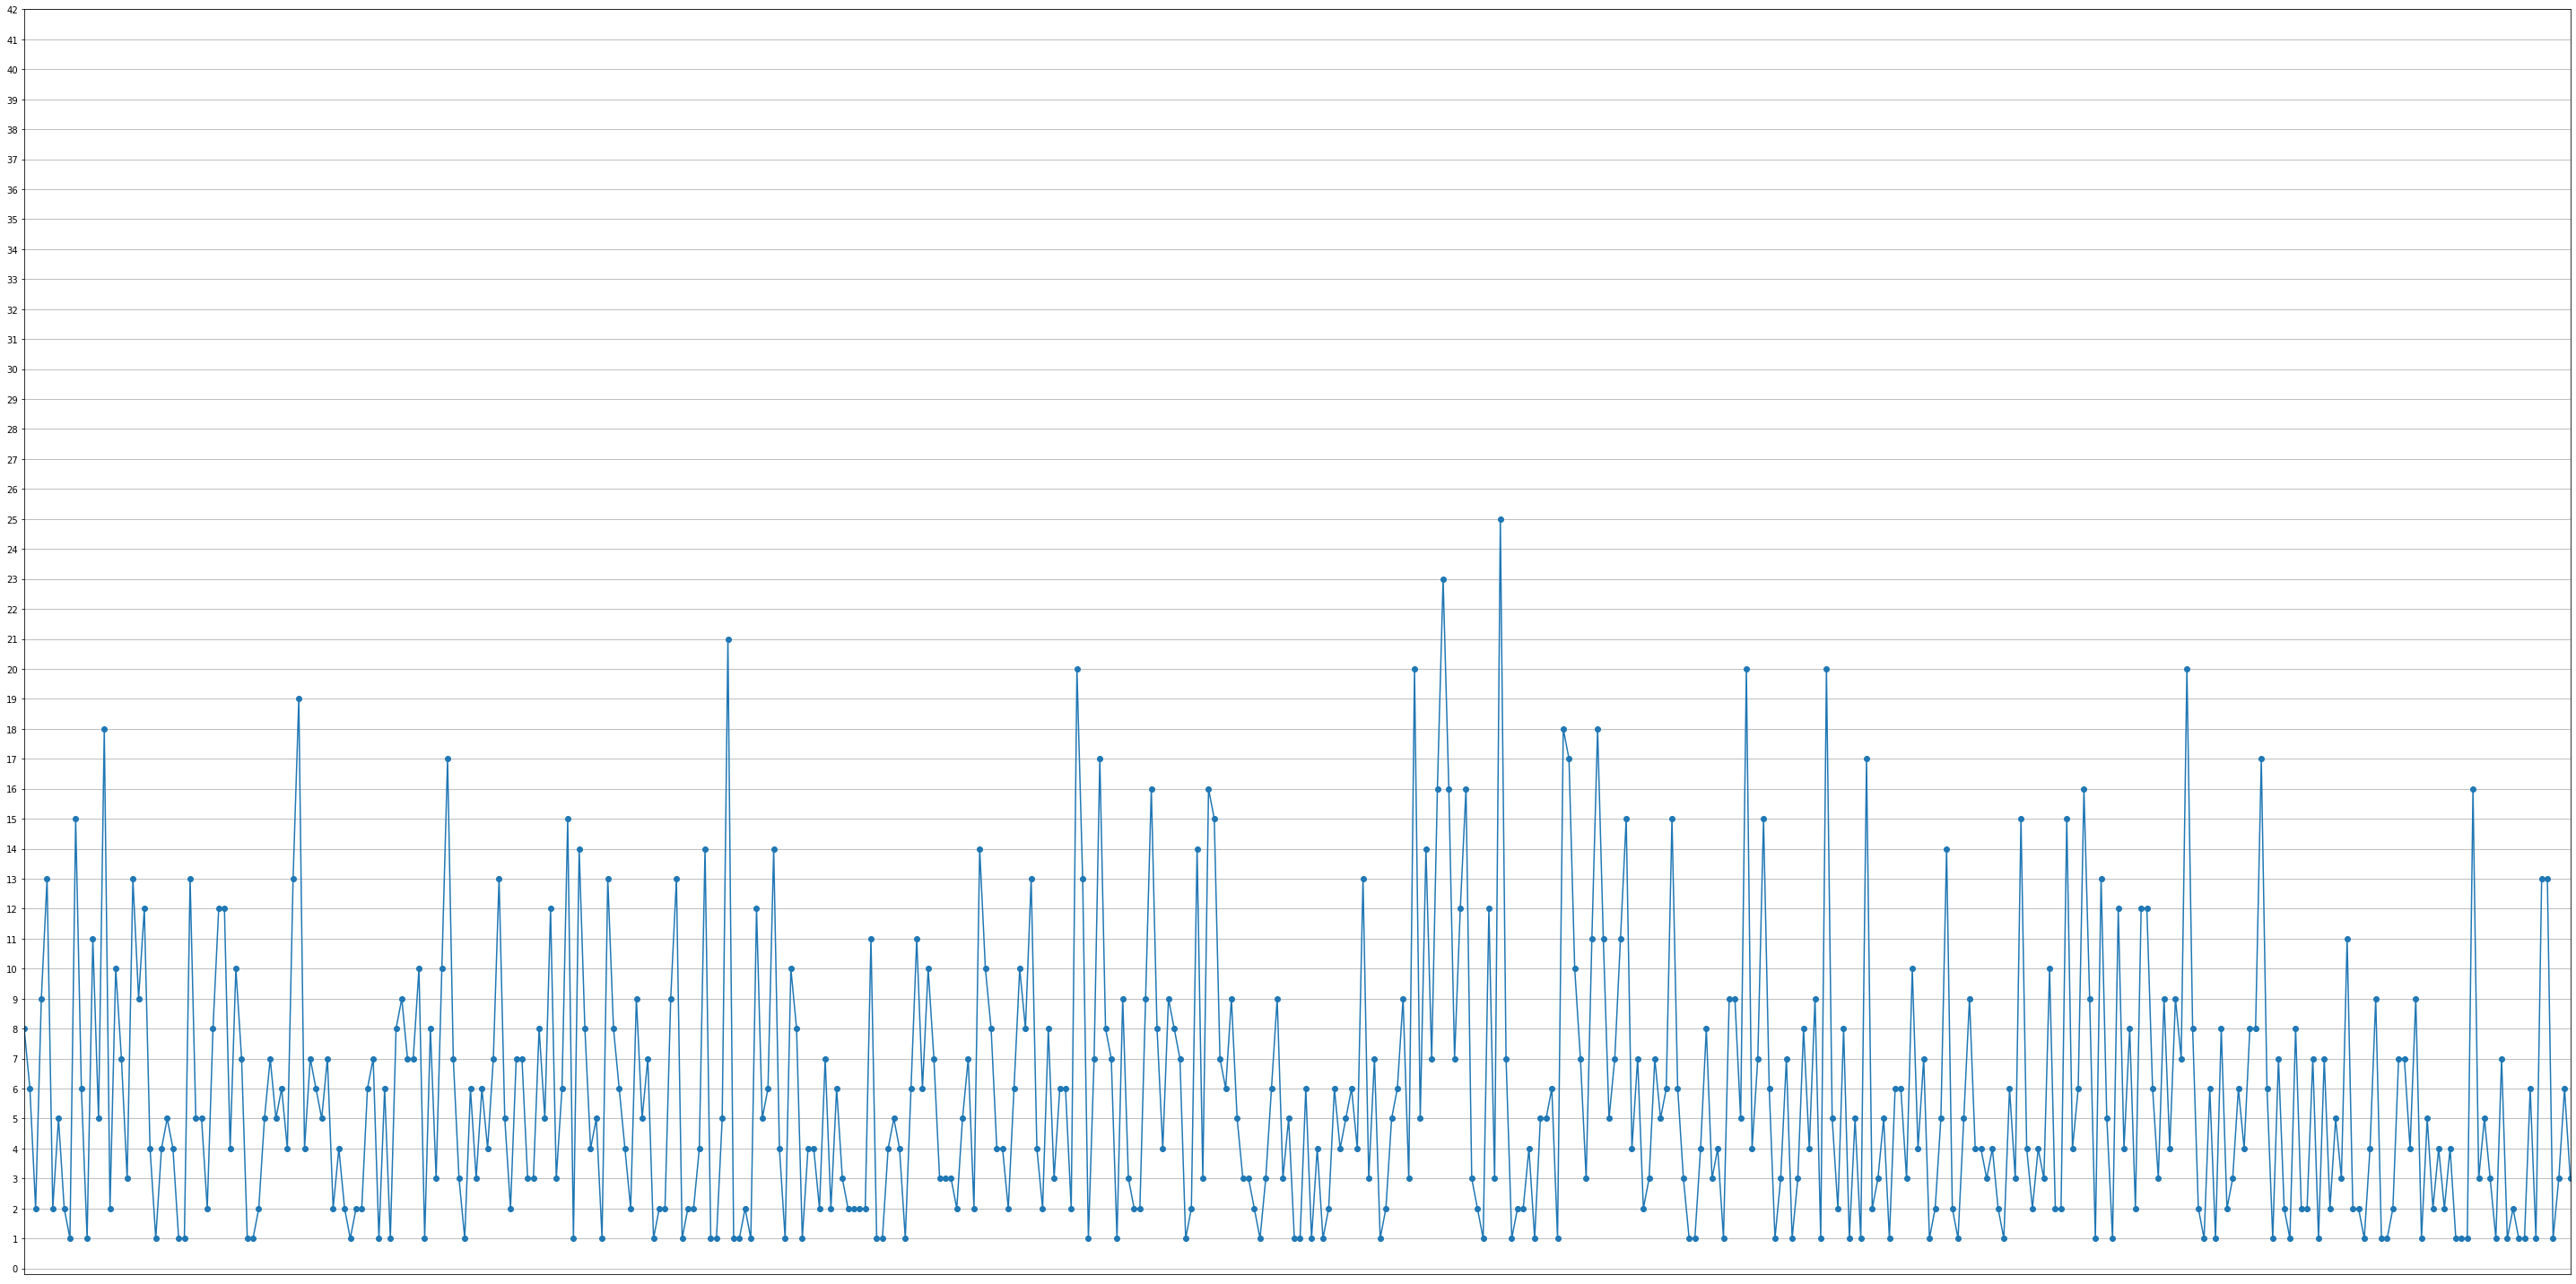

In [2]:
dates = mydata['FECHA']
nums = mydata['R1']

num_imgs = 8
size = len(dates.values)
start = 0 
chunk = size / num_imgs

for i in range(num_imgs-1):
    start = int((i) * (chunk)) + int(bool(i))
    end = int((i + 1) * (chunk))
    print(start, end)
    
    x = list(range(len(dates.values)))[start:end]
    y = list(nums.values)[start:end]
    
    fig = plt.figure( figsize=(40,20) )
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, y, linestyle='-', marker='o')

    labels = list(dates.values)[start:end]
    ticks = list(range(len(labels)))
    plt.xticks(ticks)
    ax.set_xticklabels([f"{p}" for p in labels], rotation=-90, fontsize=6)

    ax.set_yticks(list(range(max(list(nums.values)) + 1)))
    ax.set_yticklabels([f"{p}" for p in range(max(list(nums.values)) + 1)], fontsize=10)

    ax.margins(x=0)
    ax.grid(axis='y')
    plt.tight_layout()
    fig.savefig('imgs/plot' + str(i) + '.png', dpi=500)
    
#plt.show()


## Recurrent NN

We decided to use this since recurrent neural networks use history of data for prediction.
Why RNN? Any time series problem, like predicting the prices of stocks in a particular month, can be solved using an RNN. https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn

In [3]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=12):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [5]:
# load the dataset
dataframe = read_csv("Melate.csv", usecols=[2], engine='python')
dataset = dataframe.values[::-1] # ordered originally from new to old
dataset = dataset.astype('float32')
dataframe.head()

R1
0  29
1  23
2   1
3  19
4  21

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
train

array([[ 1.],
       [ 5.],
       [16.],
       ...,
       [ 8.],
       [ 3.],
       [12.]], dtype=float32)

In [8]:
# reshape into X=t and Y=t+1
look_back = 100 # amount of previous values that we plug again, with 12 is more accurate
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
from tensorflow.keras.layers import PReLU

para_relu = PReLU()
# create and fit Multilayer Perceptron model
inputs = int(size) 
print(inputs)
model = Sequential()
model.add(Dense(inputs, input_dim=look_back, activation='sigmoid'))
model.add(Dense(1, activation=para_relu))
model.compile(loss='mean_squared_error', optimizer='adam')
h=model.fit(trainX, trainY, epochs=50, batch_size=10, verbose=2)

3575
Epoch 1/50
230/230 - 2s - loss: 30.8184 - 2s/epoch - 9ms/step
Epoch 2/50
230/230 - 1s - loss: 28.4445 - 560ms/epoch - 2ms/step
Epoch 3/50
230/230 - 1s - loss: 28.7720 - 554ms/epoch - 2ms/step
Epoch 4/50
230/230 - 1s - loss: 28.0665 - 546ms/epoch - 2ms/step
Epoch 5/50
230/230 - 1s - loss: 27.0770 - 582ms/epoch - 3ms/step
Epoch 6/50
230/230 - 1s - loss: 26.1059 - 537ms/epoch - 2ms/step
Epoch 7/50
230/230 - 1s - loss: 24.6549 - 563ms/epoch - 2ms/step
Epoch 8/50
230/230 - 1s - loss: 22.4984 - 554ms/epoch - 2ms/step
Epoch 9/50
230/230 - 1s - loss: 20.4117 - 554ms/epoch - 2ms/step
Epoch 10/50
230/230 - 1s - loss: 18.4666 - 560ms/epoch - 2ms/step
Epoch 11/50
230/230 - 1s - loss: 14.5946 - 538ms/epoch - 2ms/step
Epoch 12/50
230/230 - 1s - loss: 12.0801 - 563ms/epoch - 2ms/step
Epoch 13/50
230/230 - 1s - loss: 9.3462 - 539ms/epoch - 2ms/step
Epoch 14/50
230/230 - 1s - loss: 6.7527 - 585ms/epoch - 3ms/step
Epoch 15/50
230/230 - 1s - loss: 5.2234 - 578ms/epoch - 3ms/step
Epoch 16/50
230/230 

The RMSE for your training and your test sets should be very similar if you have built a good model. If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data, i.e. you've created a model that tests well in sample, but has little predictive value when tested out of sample.
https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values

There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE's basic value is in selecting one prediction model over another.

In [10]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY) # batchsize
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY) # batchsize
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# Final evaluation of the model
scores = model.evaluate(testX, testY)
print(scores, trainScore, testScore)
print("RNN Accuracy: %.2f%%" % (100-scores))

72/72 [==============================] - 0s 2ms/step - loss: 0.7957
Train Score: 0.80 MSE (0.89 RMSE)
34/34 [==============================] - 0s 2ms/step - loss: 60.0512
Test Score: 60.05 MSE (7.75 RMSE)
34/34 [==============================] - 0s 2ms/step - loss: 60.0512
60.05122375488281 0.7957299947738647 60.05122375488281
RNN Accuracy: 39.95%


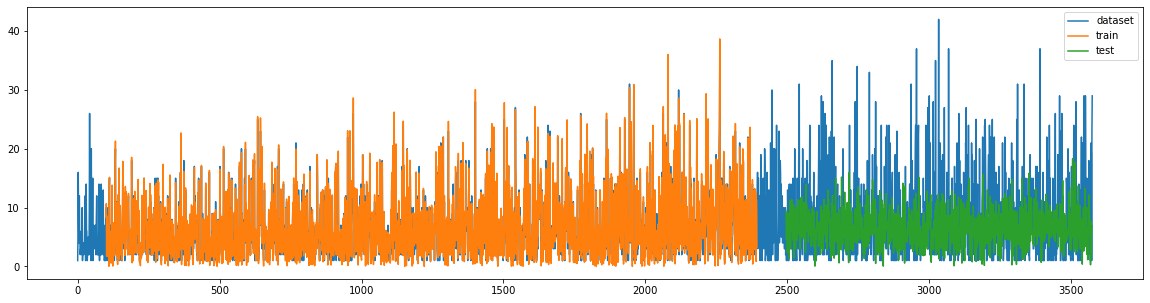

In [11]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
fig = plt.figure( figsize=(20,5) )
ax = fig.add_subplot(1,1,1)
ax.plot(dataset, label='dataset')
ax.plot(trainPredictPlot, label='train')
ax.plot(testPredictPlot, label='test')
ax.legend()
plt.show()

In [12]:
len(dataset)

3575

In [13]:
trainX

array([[ 1.,  5., 16., ...,  4.,  1.,  2.],
       [ 5., 16.,  8., ...,  1.,  2.,  9.],
       [16.,  8.,  4., ...,  2.,  9., 10.],
       ...,
       [ 3.,  5., 13., ...,  6., 11.,  1.],
       [ 5., 13.,  2., ..., 11.,  1., 11.],
       [13.,  2.,  7., ...,  1., 11.,  8.]], dtype=float32)

In [14]:
dataset

array([[ 1.],
       [ 5.],
       [16.],
       ...,
       [ 1.],
       [23.],
       [29.]], dtype=float32)

In [15]:
trainPredict[look_back-1:,0]

array([ 2.1048002,  5.9336967, 12.776481 , ..., 11.333196 ,  8.683536 ,
        3.224681 ], dtype=float32)

- 4 LSTM: https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn
- class code: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
- num of neurons: https://ai.stackexchange.com/questions/3156/how-to-select-number-of-hidden-layers-and-number-of-memory-cells-in-an-lstm#:~:text=In%20general%2C%20there%20are%20no,number%20of%20data%20points%2C%20etc.
- 7 activation functions: https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6

In [27]:
numpy.random.seed(7)
dataframe = pd.read_csv('Melate.csv', usecols=[2], engine='python')
dataset = dataframe.values[::-1]
dataset = dataset.astype('float32')

In [28]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [29]:
dataset = list(dataset) + [[0],[0]]
dataset = numpy.array(dataset)
dataset

array([[0.        ],
       [0.09756097],
       [0.36585364],
       ...,
       [0.68292683],
       [0.        ],
       [0.        ]])

In [30]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2396 1181


In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t and Y=t+1
look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [34]:
# create and fit the LSTM network
model = Sequential()

model.add(LSTM(30, return_sequences=True, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(LSTM(30, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30))
model.add(Dropout(0.2))

model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
2295/2295 - 15s - loss: 0.0176 - 15s/epoch - 6ms/step
Epoch 2/50
2295/2295 - 8s - loss: 0.0172 - 8s/epoch - 4ms/step
Epoch 3/50
2295/2295 - 8s - loss: 0.0171 - 8s/epoch - 4ms/step
Epoch 4/50
2295/2295 - 8s - loss: 0.0169 - 8s/epoch - 4ms/step
Epoch 5/50
2295/2295 - 8s - loss: 0.0167 - 8s/epoch - 4ms/step
Epoch 6/50
2295/2295 - 8s - loss: 0.0166 - 8s/epoch - 4ms/step
Epoch 7/50
2295/2295 - 8s - loss: 0.0163 - 8s/epoch - 4ms/step
Epoch 8/50
2295/2295 - 8s - loss: 0.0161 - 8s/epoch - 4ms/step
Epoch 9/50
2295/2295 - 8s - loss: 0.0160 - 8s/epoch - 4ms/step
Epoch 10/50
2295/2295 - 8s - loss: 0.0159 - 8s/epoch - 4ms/step
Epoch 11/50
2295/2295 - 8s - loss: 0.0158 - 8s/epoch - 4ms/step
Epoch 12/50
2295/2295 - 8s - loss: 0.0156 - 8s/epoch - 4ms/step
Epoch 13/50
2295/2295 - 8s - loss: 0.0155 - 8s/epoch - 4ms/step
Epoch 14/50
2295/2295 - 8s - loss: 0.0151 - 8s/epoch - 4ms/step
Epoch 15/50
2295/2295 - 8s - loss: 0.0150 - 8s/epoch - 4ms/step
Epoch 16/50
2295/2295 - 8s - loss: 0.0149 - 8s/

In [35]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.34 RMSE
Test Score: 8.23 RMSE


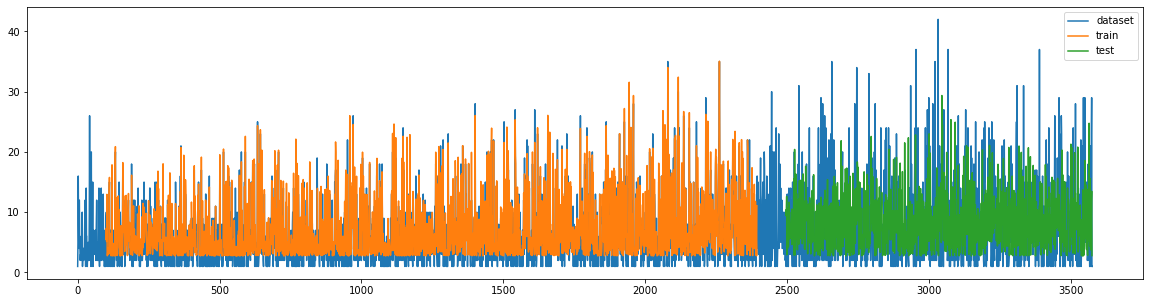

In [36]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig = plt.figure( figsize=(20,5) )
ax = fig.add_subplot(1,1,1)
ax.plot(scaler.inverse_transform(dataset), label='dataset')
ax.plot(trainPredictPlot, label='train')
ax.plot(testPredictPlot, label='test')
ax.legend()
plt.show()

In [37]:
import math
db = scaler.inverse_transform(dataset)
compare = list(db[len(trainPredict)+(look_back*2)+1:len(db)-1, :])
compare = [math.ceil(c) for c in compare]
len(compare)

1080

In [38]:
pred = list(testPredict)
pred = [math.ceil(c) for c in pred]
len(pred)

1080

In [39]:
n = pd.DataFrame({'original': compare, 'pred': pred})
n.to_csv('res.csv')

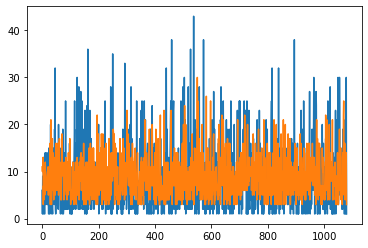

In [40]:
plt.plot(compare)
plt.plot(pred)
plt.show()

In [41]:
wrong = 0
acc = 0
for i in range(len(pred)):
    s = abs(pred[i]-compare[i])
    if s > 0:
        wrong +=1
        acc += s
print(wrong, acc/len(pred))

1027 6.4944444444444445


In [48]:
x_input = numpy.array(dataset[-look_back:])
x_input = x_input.reshape((1, 1, look_back))
yhat = model.predict(x_input, verbose=0)
print(yhat)
print(scaler.inverse_transform(yhat))

[[0.16561289]]
[[7.7901287]]
